In [3]:
# Load uploaded files again
import pandas as pd
aqi_yearly_df = pd.read_csv('aqi_yearly_1980_to_2021.csv')
storms_df = pd.read_csv('storms.csv')

# Clean AQI data
aqi_yearly_df_cleaned = (
    aqi_yearly_df
    .dropna()
    .drop_duplicates(subset='Year')
    .rename(columns=lambda x: x.strip().lower().replace(' ', '_'))
)
aqi_yearly_df_cleaned['year'] = aqi_yearly_df_cleaned['year'].astype(int)

# Aggregate AQI per year
aqi_avg_by_year = aqi_yearly_df_cleaned.groupby('year').agg(
    avg_median_aqi=('median_aqi', 'mean'),
    avg_90th_percentile_aqi=('90th_percentile_aqi', 'mean')
).reset_index()

# Clean storms data

# Clean storms data
storms_df_cleaned = (
    storms_df
    .rename(columns=lambda x: x.strip().lower().replace(' ', '_'))
    .dropna(subset=['year', 'max_wind_speed'])
)
storms_df_cleaned['year'] = storms_df_cleaned['year'].astype(int)


# Aggregate storm stats per year
storm_stats = storms_df_cleaned.groupby('year').agg(
    storm_count=('max_wind_speed', 'count'),
    avg_wind_speed=('max_wind_speed', 'mean'),
    max_wind_speed=('max_wind_speed', 'max'),
    min_wind_speed=('max_wind_speed', 'min'),
    std_wind_speed=('max_wind_speed', 'std'),
    median_wind_speed=('max_wind_speed', 'median'),
).reset_index()

# Merge AQI and storm data for years 1980–2021
merged_df = pd.merge(aqi_avg_by_year, storm_stats, on='year', how='inner')
merged_df = merged_df[(merged_df['year'] >= 1980) & (merged_df['year'] <= 2021)]

# Export final cleaned merged dataset
merged_output_path = "/mnt/data/merged_aqi_storms_1980_2021.csv"
merged_df.to_csv(merged_output_path, index=False)

import ace_tools as tools; tools.display_dataframe_to_user(name="Dữ liệu kết hợp AQI và Bão 1980-2021", dataframe=merged_df)

merged_output_path


KeyError: ['max_wind_speed']

In [6]:
pd.read_csv("D:\SUM25\MAS\merged_detailed_aqi_storms_1980_2021.csv")

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_35080\2827091709.py:1: SyntaxWarning: invalid escape sequence '\S'
  pd.read_csv("D:\SUM25\MAS\merged_detailed_aqi_storms_1980_2021.csv")


,year,avg_median_aqi,avg_90th_percentile_aqi,total_days_co,total_days_no2,total_days_ozone,total_days_so2,total_days_pm25,total_days_pm10,storm_count,avg_wind_speed,max_wind_speed,min_wind_speed,std_wind_speed,median_wind_speed
0,1980,51.0,140.0,207,0,136,0,0,0,459,51.071895,165,-99,32.084585,40.0
1,1981,44.0,143.0,0,0,188,0,0,0,455,42.057143,115,-99,27.666218,35.0
2,1982,48.0,115.0,0,0,197,0,0,0,141,44.042553,115,20,22.841964,30.0
3,1983,45.0,129.0,0,0,210,0,0,0,135,38.925926,100,20,17.356933,30.0
4,1984,47.0,122.0,0,0,259,0,0,0,422,43.137441,115,-99,23.273140,40.0
5,1985,45.0,97.0,0,0,257,0,0,25,373,48.378016,125,20,23.537530,40.0
6,1986,46.0,122.0,0,0,248,0,0,27,232,40.784483,90,-99,24.183571,40.0
7,1987,39.0,57.0,0,0,0,0,0,59,370,33.413514,110,-99,19.342984,30.0
8,1988,33.0,56.0,0,0,0,0,0,58,430,46.627907,160,15,29.310669,30.0
9,1989,28.0,46.0,0,0,0,0,0,57,452,51.438053,140,15,28.889854,40.0


In [7]:
import pandas as pd

# Bước 1: Đọc dữ liệu
aqi_df = pd.read_csv('aqi_yearly_1980_to_2021.csv')
storms_df = pd.read_csv('storms.csv')

# Bước 2: Làm sạch và chuẩn hóa tên cột
aqi_df.columns = aqi_df.columns.str.strip().str.lower().str.replace(' ', '_')
storms_df.columns = storms_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Bước 3: Chuyển 'year' về kiểu int
aqi_df['year'] = aqi_df['year'].astype(int)
storms_df['year'] = storms_df['year'].astype(int)

# Bước 4: Tổng hợp AQI theo năm (lấy trung bình + tổng số ngày theo chất ô nhiễm)
aqi_summary = aqi_df.groupby('year').agg(
    avg_median_aqi=('median_aqi', 'mean'),
    avg_90th_percentile_aqi=('90th_percentile_aqi', 'mean'),
    total_days_co=('days_co', 'sum'),
    total_days_no2=('days_no2', 'sum'),
    total_days_ozone=('days_ozone', 'sum'),
    total_days_so2=('days_so2', 'sum'),
    total_days_pm25=('days_pm2.5', 'sum'),
    total_days_pm10=('days_pm10', 'sum'),
).reset_index()

# Bước 5: Tổng hợp storms theo năm
storm_summary = storms_df.groupby('year').agg(
    storm_count=('wind', 'count'),
    avg_wind_speed=('wind', 'mean'),
    max_wind_speed=('wind', 'max'),
    min_wind_speed=('wind', 'min'),
    std_wind_speed=('wind', 'std'),
    median_wind_speed=('wind', 'median'),
).reset_index()

# Bước 6: Gộp hai bảng theo năm
merged_df = pd.merge(aqi_summary, storm_summary, on='year', how='inner')

# Bước 7: Lọc từ năm 1980–2021
merged_df = merged_df[(merged_df['year'] >= 1980) & (merged_df['year'] <= 2021)]

# Bước 8: Xuất ra file
merged_df.to_csv('merged_detailed_aqi_storms_1980_2021.csv', index=False)

print("✅ Đã gộp và lưu thành công vào file: merged_detailed_aqi_storms_1980_2021.csv")


✅ Đã gộp và lưu thành công vào file: merged_detailed_aqi_storms_1980_2021.csv


In [12]:
import pandas as pd
pd.read_csv("merged_detailed_aqi_storms_1980_2021.csv")

,year,avg_median_aqi,avg_90th_percentile_aqi,total_days_co,total_days_no2,total_days_ozone,total_days_so2,total_days_pm25,total_days_pm10,storm_count,avg_wind_speed,max_wind_speed,min_wind_speed,std_wind_speed,median_wind_speed
0,1980,50.595289,109.520343,19739,13903,55121,54824,0,0,459,51.071895,165,-99,32.084585,40.0
1,1981,49.092437,101.134454,20915,13543,59362,55964,0,0,455,42.057143,115,-99,27.666218,35.0
2,1982,48.807453,99.335404,21617,12612,62983,56364,0,3,141,44.042553,115,20,22.841964,30.0
3,1983,46.851703,106.216433,21897,12524,66689,59462,0,141,135,38.925926,100,20,17.356933,30.0
4,1984,48.137295,100.172131,21418,13674,65300,59587,0,563,422,43.137441,115,-99,23.273140,40.0
5,1985,46.496269,95.623134,19296,13300,67695,55862,0,5770,373,48.378016,125,20,23.537530,40.0
6,1986,45.650362,93.652174,17571,13046,66069,54884,0,12869,232,40.784483,90,-99,24.183571,40.0
7,1987,44.575130,96.996546,17932,13637,71298,53235,0,12223,370,33.413514,110,-99,19.342984,30.0
8,1988,44.034091,102.603896,17226,14010,77155,52560,1137,14444,430,46.627907,160,15,29.310669,30.0
9,1989,41.631173,85.033951,16703,14678,78495,52881,1401,17933,452,51.438053,140,15,28.889854,40.0


📈 Hệ số hồi quy:
avg_median_aqi: -12.4820
total_days_co: -0.0316
total_days_no2: 0.0247
total_days_ozone: -0.0015
total_days_so2: 0.0070
total_days_pm25: 0.0019
total_days_pm10: -0.0139
Intercept: 990.73
R² (hệ số xác định): 0.2600


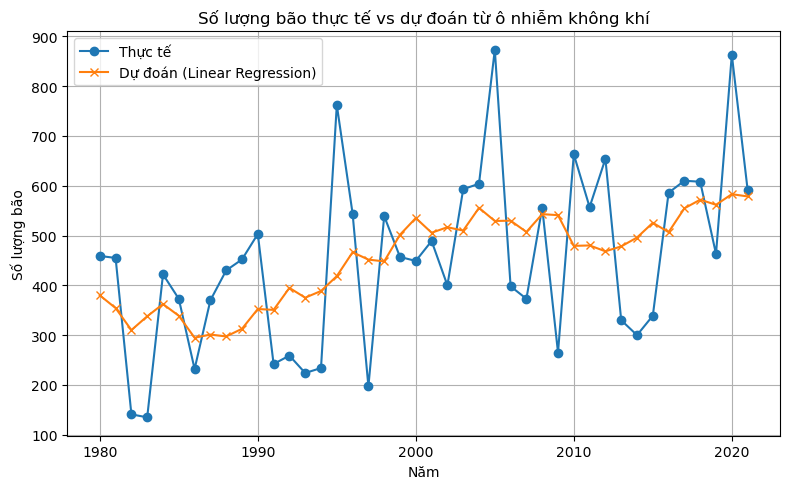

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Bước 1: Đọc file đã merge
df = pd.read_csv('merged_detailed_aqi_storms_1980_2021.csv')

# Bước 2: Xác định biến đầu vào (X) và biến đầu ra (y)
X = df[['avg_median_aqi', 'total_days_co', 'total_days_no2',
        'total_days_ozone', 'total_days_so2', 'total_days_pm25', 'total_days_pm10']]

y = df['storm_count']  # Số lượng bão mỗi năm

# Bước 3: Tạo mô hình hồi quy
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Bước 4: In hệ số hồi quy
print("📈 Hệ số hồi quy:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R² (hệ số xác định): {r2_score(y, y_pred):.4f}")

# Bước 5: Vẽ biểu đồ so sánh thực tế vs dự đoán
plt.figure(figsize=(8, 5))
plt.plot(df['year'], y, label='Thực tế', marker='o')
plt.plot(df['year'], y_pred, label='Dự đoán (Linear Regression)', marker='x')
plt.title('Số lượng bão thực tế vs dự đoán từ ô nhiễm không khí')
plt.xlabel('Năm')
plt.ylabel('Số lượng bão')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
